In [3]:
import os, sys
import tqdm
sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))

import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt

from src.visualization import plot_action
from src.preprocess_data import preprocess_data
from src.labels import preprocess_label

In [4]:
import ast 
all_events = pd.read_csv('../data/EPV-data/all-match.csv')
all_events['freeze_frame'] = all_events['freeze_frame'].apply(ast.literal_eval)
all_events['Baseline Intended-Receiver'] = all_events['Baseline Intended-Receiver'].apply(ast.literal_eval)
all_events.head(8)

,team,type,subtype,session,start_frame,start_time,end_frame,end_time,from,to,...,goal,ownGoal,teamId,eventName,freeze_frame,accurate,value_label,Baseline Intended-Receiver,game_id,event_id
0,Away,SET PIECE,KICK OFF,1,1,0.04,0,0.00,B19,NaN,...,0,0,2,SET PIECE,{},NaN,0,{},1,0
1,Away,PASS,PASS,1,1,0.04,3,0.12,B19,B21,...,0,0,2,Pass,"{'B25': {'teammate': True, 'actor': False, 'ba...",1.0,0,"{'dist': {'ID': 'B21', 'end_x': 59.66244, 'end...",1,1
2,Away,PASS,PASS,1,3,0.12,17,0.68,B21,B15,...,0,0,2,Pass,"{'B25': {'teammate': True, 'actor': False, 'ba...",1.0,0,"{'dist': {'ID': 'B15', 'end_x': 63.06444, 'end...",1,2
3,Away,PASS,PASS,1,45,1.80,61,2.44,B15,B19,...,0,0,2,Pass,"{'B25': {'teammate': True, 'actor': False, 'ba...",1.0,0,"{'dist': {'ID': 'B19', 'end_x': 48.33756, 'end...",1,3
4,Away,PASS,PASS,1,77,3.08,96,3.84,B19,B21,...,0,0,2,Pass,"{'B25': {'teammate': True, 'actor': False, 'ba...",1.0,0,"{'dist': {'ID': 'B21', 'end_x': 52.67376, 'end...",1,4
5,Away,PASS,PASS,1,191,7.64,217,8.68,B21,B22,...,0,0,2,Pass,"{'B25': {'teammate': True, 'actor': False, 'ba...",1.0,0,"{'dist': {'ID': 'B22', 'end_x': 33.16356, 'end...",1,5
6,Away,PASS,PASS,1,279,11.16,303,12.12,B22,B17,...,0,0,2,Pass,"{'B25': {'teammate': True, 'actor': False, 'ba...",1.0,0,"{'dist': {'ID': 'B17', 'end_x': 51.54516, 'end...",1,6
7,Away,BALL LOST,INTERCEPTION,1,346,13.84,380,15.20,B17,NaN,...,0,0,2,Pass,"{'B25': {'teammate': True, 'actor': False, 'ba...",0.0,0,"{'dist': {'ID': 'B18', 'end_x': 34.398, 'end_y...",1,7


### 실패한 패스에 대해서 intended-receiver레이블링 한 receiver합치기

In [5]:
unsuccess_passes = pd.read_csv('../data/EPV-data/unsuccess_passes.csv')
unsuccess_passes = unsuccess_passes.rename(columns={'Mingu':'True Intended-receiver'})

unsuccess_passes['True Intended-receiver'] = unsuccess_passes.apply(
    lambda row: row['from'][0] + format(int(row['True Intended-receiver']), "02d")
    if pd.notna(row['True Intended-receiver']) else row['True Intended-receiver'], axis=1
)
unsuccess_passes

,type,subtype,game_id,event_id,from,True Intended-receiver,no pass
0,BALL LOST,INTERCEPTION,1,7,B17,B24,NaN
1,BALL LOST,INTERCEPTION,1,9,A02,A10,NaN
2,BALL LOST,INTERCEPTION,1,17,A10,A08,NaN
3,BALL LOST,INTERCEPTION,1,23,B17,B21,NaN
4,BALL LOST,INTERCEPTION,1,28,A08,A09,NaN
...,...,...,...,...,...,...,...
406,BALL LOST,INTERCEPTION,3,7224,B21,B31,NaN
407,BALL LOST,INTERCEPTION,3,7237,A17,A01,NaN
408,BALL OUT,CLEARANCE,3,7248,A01,NaN,1.0
409,BALL LOST,CLEARANCE,3,7255,A11,NaN,1.0


In [11]:
all_events = pd.merge(all_events, unsuccess_passes,on='event_id', how='left', suffixes=('', '_drop'))
all_events = all_events.loc[:, ~all_events.columns.str.endswith('_drop')]
all_events.to_csv('../data/EPV-data/labeling-all-match.csv',index=False)
all_events

,team,type,subtype,session,start_frame,start_time,end_frame,end_time,from,to,...,teamId,eventName,freeze_frame,accurate,value_label,Baseline Intended-Receiver,game_id,event_id,True Intended-receiver,no pass
0,Away,SET PIECE,KICK OFF,1,1,0.04,0,0.00,B19,NaN,...,2,SET PIECE,{},NaN,0,{},1,0,NaN,NaN
1,Away,PASS,PASS,1,1,0.04,3,0.12,B19,B21,...,2,Pass,"{'B25': {'teammate': True, 'actor': False, 'ba...",1.0,0,"{'dist': {'ID': 'B21', 'end_x': 59.66244, 'end...",1,1,NaN,NaN
2,Away,PASS,PASS,1,3,0.12,17,0.68,B21,B15,...,2,Pass,"{'B25': {'teammate': True, 'actor': False, 'ba...",1.0,0,"{'dist': {'ID': 'B15', 'end_x': 63.06444, 'end...",1,2,NaN,NaN
3,Away,PASS,PASS,1,45,1.80,61,2.44,B15,B19,...,2,Pass,"{'B25': {'teammate': True, 'actor': False, 'ba...",1.0,0,"{'dist': {'ID': 'B19', 'end_x': 48.33756, 'end...",1,3,NaN,NaN
4,Away,PASS,PASS,1,77,3.08,96,3.84,B19,B21,...,2,Pass,"{'B25': {'teammate': True, 'actor': False, 'ba...",1.0,0,"{'dist': {'ID': 'B21', 'end_x': 52.67376, 'end...",1,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7295,Home,PASS,PASS,2,143406,5736.24,143469,5738.76,B29,B33,...,1,Pass,"{'A01': {'teammate': False, 'actor': False, 'b...",1.0,0,"{'dist': {'ID': 'B33', 'end_x': 28.95695999999...",3,7295,NaN,NaN
7296,Home,PASS,PASS,2,143469,5738.76,143532,5741.28,B33,B34,...,1,Pass,"{'A01': {'teammate': False, 'actor': False, 'b...",1.0,0,"{'dist': {'ID': 'B34', 'end_x': 14.08751999999...",3,7296,NaN,NaN
7297,Home,CARRY,CARRY,2,143469,5738.76,143470,5738.80,B33,NaN,...,1,CARRY,"{'A01': {'teammate': False, 'actor': False, 'b...",NaN,0,{},3,7297,NaN,NaN
7298,Home,CARRY,CARRY,2,143532,5741.28,143553,5742.12,B34,NaN,...,1,CARRY,"{'A01': {'teammate': False, 'actor': False, 'b...",NaN,0,{},3,7298,NaN,NaN


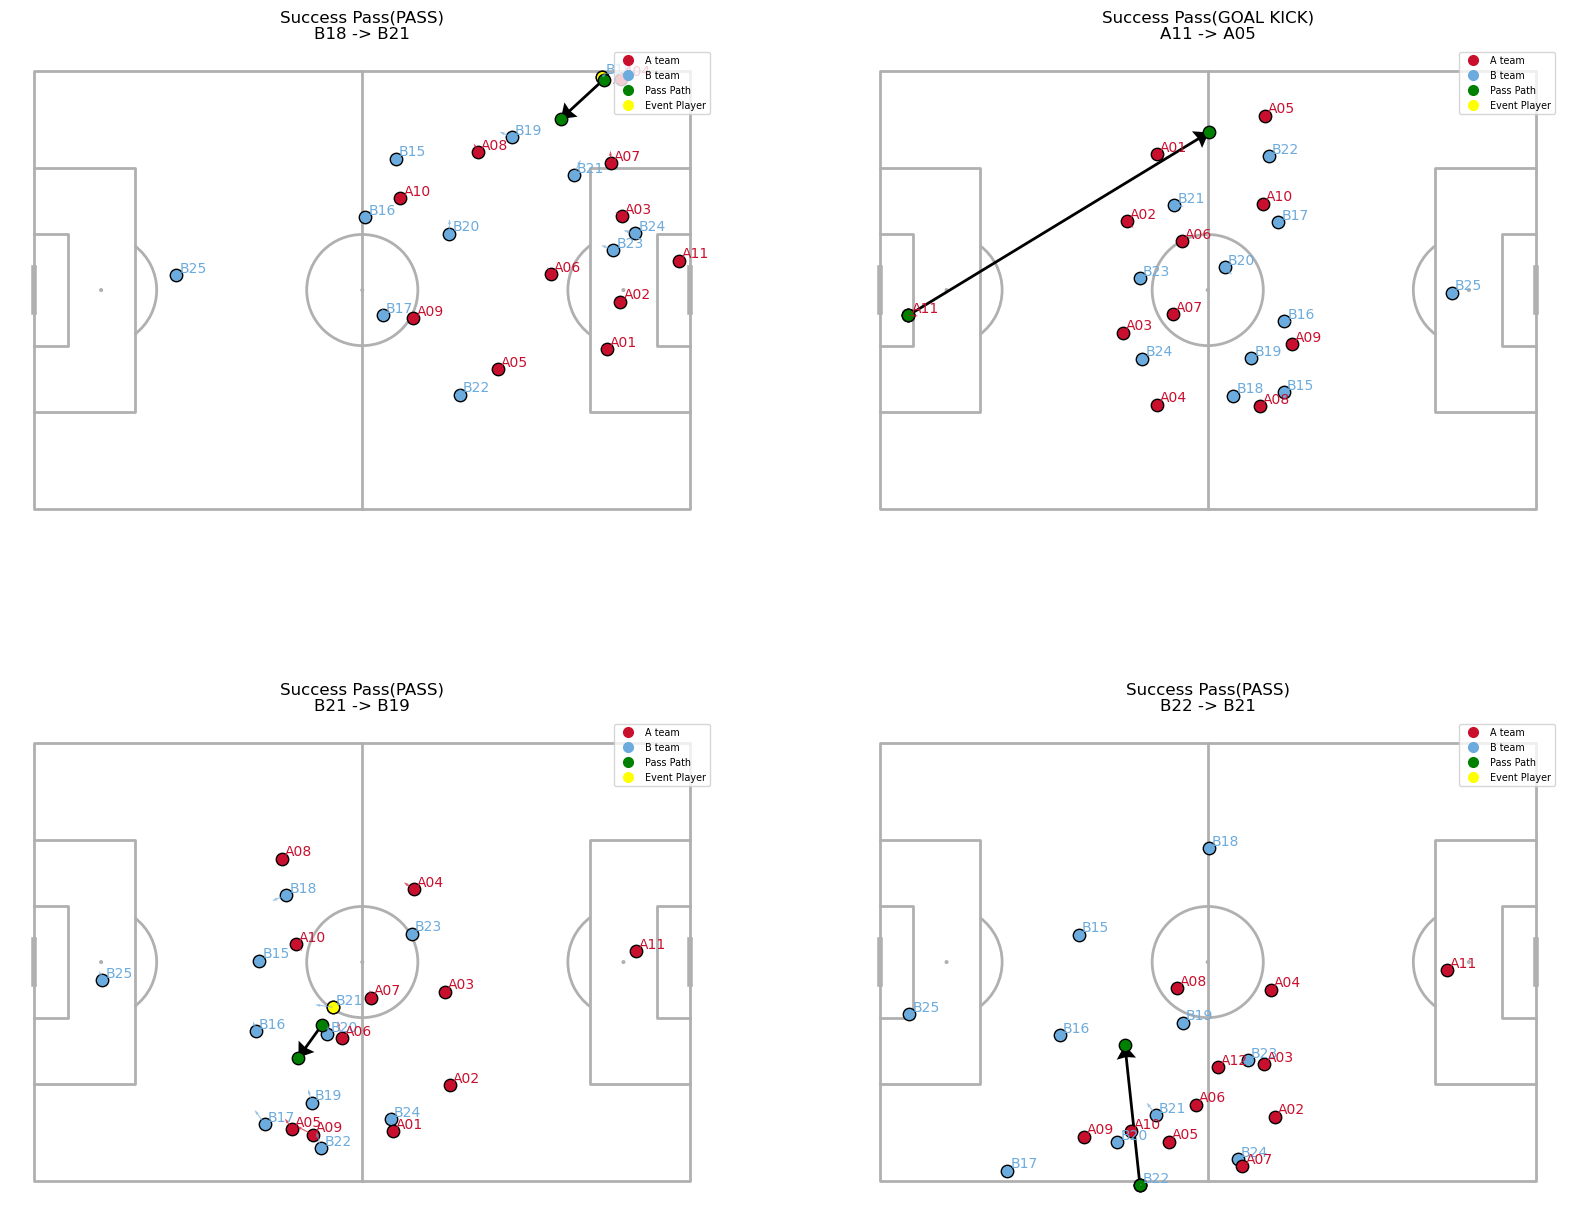

In [13]:
action_id = [96, 168, 305, 580]

fig, ax = plt.subplots(2,2,figsize=(20,16))

ax_id = [ax[0,0], ax[0,1], ax[1,0], ax[1,1]] 

for i in range(len(action_id)):
    record = all_events.loc[action_id[i]]
    plot_action(record, ax=ax_id[i],field_dimen=(108,72))

plt.show()

### Intended-receiver 평가 지표
- Baseline(거리/각도기반)을 평가할 예정
- 성공한 패스에 대한 receiver(to)과 어느정도 정확한지
- 실패한 패스에 대한 receiver(to)과 어느정도 정확한지

In [31]:
# 각 방식에 대한 정확도 계산
methods = ['dist', 'dist and angle', 'dist and narrow angle']

# 정확도를 계산하는 함수
def calculate_accuracy(events, method, label="to"):
    correct_predictions = events.apply(lambda row: row['Baseline Intended-Receiver'][method]['ID'] == row[label], axis=1)
    accuracy = correct_predictions.mean()
    return accuracy

In [32]:
success_pass_events = all_events[(all_events['eventName'] == 'Pass') & (all_events['accurate'] == 1) & (all_events['start_frame'] < all_events['end_frame'])]
print(success_pass_events.shape)

accuracy = {method: calculate_accuracy(success_pass_events, method) for method in methods}
accuracy

(2882, 27)


{'dist': 0.9680777238029147,
 'dist and angle': 0.905968077723803,
 'dist and narrow angle': 0.8244274809160306}

In [38]:
unsuccess_pass_events = all_events[(all_events['eventName'] == 'Pass') & (all_events['accurate'] == 0) & (all_events['start_frame'] < all_events['end_frame'])]
print(unsuccess_pass_events.shape)

unsuccess_pass_events = unsuccess_pass_events[unsuccess_pass_events['True Intended-receiver'].notna()]
print(unsuccess_pass_events.shape)

unsuccess_pass_events = unsuccess_pass_events[unsuccess_pass_events['no pass'].isna()]
print(unsuccess_pass_events.shape)

accuracy = {method: calculate_accuracy(unsuccess_pass_events, method, label="True Intended-receiver") for method in methods}
accuracy

(411, 27)
(381, 27)
(381, 27)


{'dist': 0.7139107611548556,
 'dist and angle': 0.6981627296587927,
 'dist and narrow angle': 0.47506561679790027}